In [1]:
import ffn as fin
import pandas as pd
import math as m

___Load the data___

In [2]:
pqqq = fin.get(['QQQ'],start = '2006-01-01').dropna().rebase()

[*********************100%%**********************]  1 of 1 completed


In [3]:
dates = pqqq.index

In [4]:
pqqq.set_index(pd.to_datetime(dates,format="%Y-%m-%d",yearfirst=True,dayfirst=False))
pqqq.head()

,qqq
Date,
2006-01-03,100.000000
2006-01-04,101.040939
2006-01-05,101.476672
2006-01-06,103.316410
2006-01-09,103.727946


In [5]:
reqqq = pqqq.to_returns().dropna()
reqqq.head() #not monthly

,qqq
Date,
2006-01-04,0.010409
2006-01-05,0.004312
2006-01-06,0.018130
2006-01-09,0.003983
2006-01-10,0.000700


Monthly returns of 36One hedge fund are loaded ...

In [6]:
from_disk = pd.read_csv('resources/serialized_returns.csv',delimiter=' ')

and converted to a dataframe with a datetime index

In [7]:
re36o = from_disk.set_index(pd.DatetimeIndex(pd.to_datetime(from_disk['Date'],format="%Y-%m-%d",yearfirst=True,dayfirst=False))).drop('Date',axis='columns')

The joint returns cannot be formulated (below) as the *reqqq* dataframe has daily entries.

In [8]:
jointre = reqqq.merge(re36o,on='Date')
jointre

,qqq,36O
Date,,
2006-05-01,-0.009797,0.0002
2006-06-01,0.023699,0.0144
2006-08-01,-0.016712,0.0335
2006-09-01,0.005403,0.0239
2006-11-01,-0.013621,0.0625
...,...,...
2023-12-01,0.002855,-0.0014
2024-02-01,0.011775,0.0113
2024-03-01,0.015057,0.0176


So *reqqq* and *re36o* should be converted to price indices.

In [9]:
piqqq = reqqq.to_price_index()
pi36o = re36o.to_price_index()

and then merged

In [10]:
pi  = piqqq.merge(pi36o,on="Date").dropna()
pi.head()

,qqq,36O
Date,,
2006-05-01,100.385101,101.290254
2006-06-01,96.266971,102.748834
2006-08-01,88.429318,108.739502
2006-09-01,94.731885,111.338376
2006-11-01,101.868666,123.715028


__Analyse the data__

__Performance__

<Axes: xlabel='Date'>

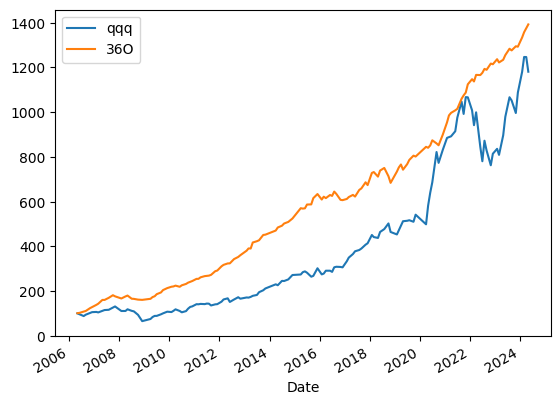

In [11]:
pi.plot()

Now the indices can be used as prices and *calc_stats* derived.

In [12]:
pistats = pi.calc_stats()

From the *pistats* object the monthly returns can be extracted.

In [13]:
reqqq = pd.DataFrame(pistats['qqq'].monthly_returns.dropna())

In [14]:
re36o = pd.DataFrame(pistats['36O'].monthly_returns.dropna())

and merged again...

In [15]:
mthly_returns = reqqq.merge(re36o,on="Date")

And when plotted they give an idea of the volatility of the two securities.

<Axes: xlabel='Date'>

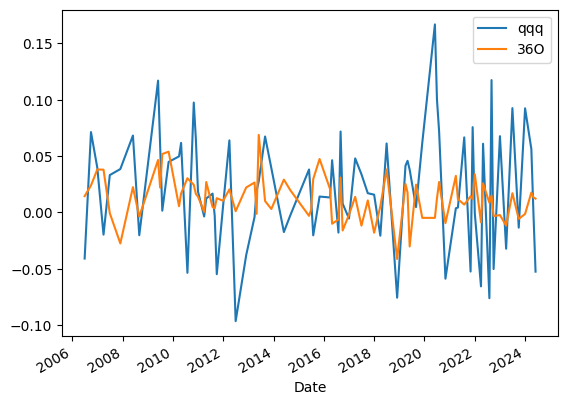

In [16]:
mthly_returns.plot()

Also, the histograms on common axes give an idea of the differences in returns between the two securities.

array([[<Axes: title={'center': 'qqq'}>, <Axes: title={'center': '36O'}>]],
      dtype=object)

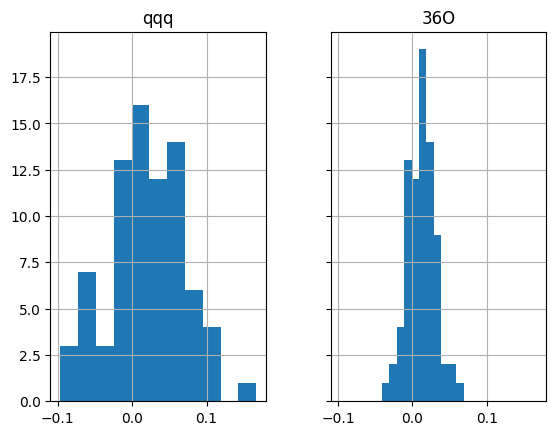

In [17]:
mthly_returns.hist(bins=11,sharey=True,sharex=True)

Now go back to the price index *pi* and look at the log of the prices over time.

In [18]:
logpi = pi.map(m.log)

<Axes: xlabel='Date'>

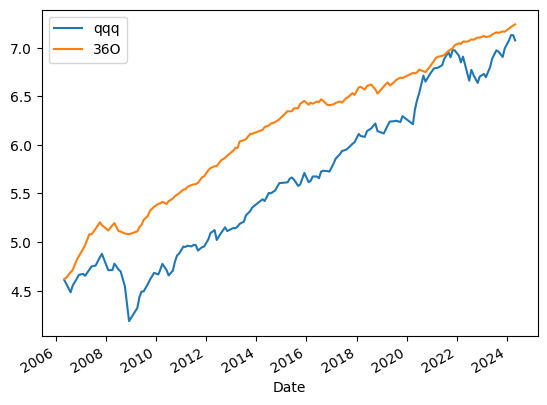

In [19]:
logpi.plot()

Looking at this graph there is a linear increase of the qqq security over time from about 2009 with a deviation from 2020 to 2023. 
The 36o security is on a convex arch, caving into qqq as both were rebased off Apr-2006. To make clearer what is going on, rebase from a few different dates

<Axes: xlabel='Date'>

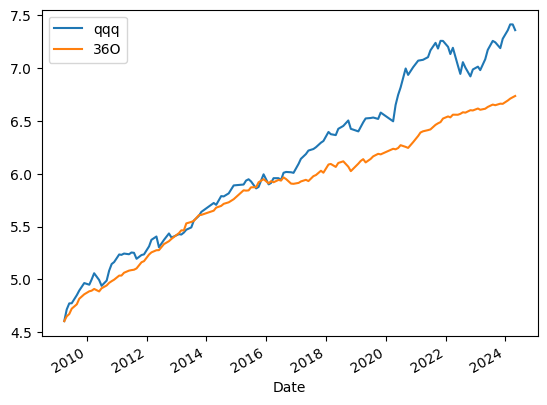

In [20]:
pi['2009-01-01':].rebase().map(m.log).plot()


More interesting things happen from 2016.

<Axes: xlabel='Date'>

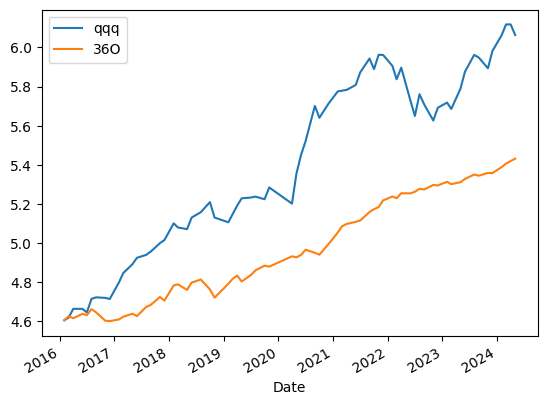

In [21]:
pi['2016-01-01':].rebase().map(m.log).plot()

You can see that 36One performed to match the Nasdaq (QQQ) index until 2016. Since then performance of 36One has grown worse, and its performance is really veering away from QQQ.

In [22]:
inflation2024 = 0.0289
inflation_factor = 1 + inflation2024
twenty_year_treasury = 0.0486
nominal_factor = 1 + twenty_year_treasury
riskfree_factor = nominal_factor/inflation_factor
nominal_riskfree  = riskfree_factor - 1
nominal_riskfree

0.019146661483137484

In [23]:
pistats.set_riskfree_rate(nominal_riskfree)

In [24]:
pistats.display()

Stat                 qqq         36O
-------------------  ----------  ----------
Start                2006-05-01  2006-05-01
End                  2024-05-01  2024-05-01
Risk-free rate       1.91%       1.91%

Total Return         1076.19%    1274.45%
Daily Sharpe         -           -
Daily Sortino        -           -
CAGR                 14.67%      15.67%
Max Drawdown         -49.97%     -11.47%
Calmar Ratio         0.29        1.37

MTD                  -5.27%      1.22%
3m                   0.05%       4.37%
6m                   18.54%      7.55%
YTD                  8.51%       7.70%
1Y                   31.70%      12.81%
3Y (ann.)            9.15%       11.71%
5Y (ann.)            18.17%      13.38%
10Y (ann.)           17.96%      11.13%
Since Incep. (ann.)  14.67%      15.67%

Daily Sharpe         -           -
Daily Sortino        -           -
Daily Mean (ann.)    -           -
Daily Vol (ann.)     -           -
Daily Skew           -           -
Daily Kurt           -     

In [25]:
pistats.update()

In [26]:
pistats.display()

Stat                 qqq         36O
-------------------  ----------  ----------
Start                2006-05-01  2006-05-01
End                  2024-05-01  2024-05-01
Risk-free rate       1.91%       1.91%

Total Return         1076.19%    1274.45%
Daily Sharpe         -           -
Daily Sortino        -           -
CAGR                 14.67%      15.67%
Max Drawdown         -49.97%     -11.47%
Calmar Ratio         0.29        1.37

MTD                  -5.27%      1.22%
3m                   0.05%       4.37%
6m                   18.54%      7.55%
YTD                  8.51%       7.70%
1Y                   31.70%      12.81%
3Y (ann.)            9.15%       11.71%
5Y (ann.)            18.17%      13.38%
10Y (ann.)           17.96%      11.13%
Since Incep. (ann.)  14.67%      15.67%

Daily Sharpe         -           -
Daily Sortino        -           -
Daily Mean (ann.)    -           -
Daily Vol (ann.)     -           -
Daily Skew           -           -
Daily Kurt           -     